## 1. Specifying and fitting models

### MP expense data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/mpexpenses_2018_office.csv'
mpexpenses = pd.read_csv(url)

In [3]:
mpexpenses[:][:5]

,Date,Claim No.,MP's Name,MP's Constituency,Category,Expense Type,Short Description,Details,Amount Claimed,Amount Paid,Amount Not Paid,Amount Repaid,Status,mp_id,Reason If Not Paid
0,03/09/2018,675558,Tonia Antoniazzi,Gower CC,Office Costs,Const Office Tel. Usage/Rental,BT Telephone,BT Telephone,307.57,0.0,307.57,0.0,Not Paid,863,Duplicate Claim
1,14/09/2018,690616,Luciana Berger,"Liverpool, Wavertree BC",Office Costs,Computer SW Purchase,Evernote Bill 2018,Software annual cost,44.99,0.0,44.99,0.0,Not Paid,198,Insufficient Evidence
2,05/09/2018,684392,Steve Brine,Winchester CC,Office Costs,Const Office Tel. Usage/Rental,September credit card,BT PAY BY PHONE,40.00,0.0,40.00,0.0,Not Paid,286,Not Under Scheme
3,16/04/2018,654477,Deidre Brock,Edinburgh North and Leith BC,Office Costs,Const Office Tel. Usage/Rental,April Payment Card,BT BILL PAYMENT 2,40.00,40.0,0.00,0.0,Paid,466,Not Under Scheme
4,09/10/2018,688933,Yvette Cooper,"Normanton, Pontefract and Castleford CC",Office Costs,Const Office Tel. Usage/Rental,IPSA card Oct,BT PAY BY PHONE,40.00,0.0,40.00,0.0,Not Paid,671,Not Under Scheme


In [4]:
(mpexpenses['Amount Claimed'] < 0).value_counts()

False    51276
True       391
Name: Amount Claimed, dtype: int64

In [5]:
# convert the dataframe into a numpy array
mpexpenses = mpexpenses['Amount Claimed'].values
mpexpenses.size

51667

In [6]:
mpexpenses = mpexpenses[mpexpenses > 0]
mpexpenses.size

51210

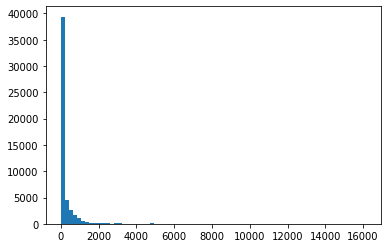

In [7]:
plt.hist(mpexpenses, bins=75)
plt.show()

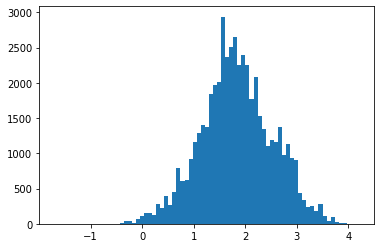

In [8]:
# because small claims are swaped out by a few much larger claims, we use a log plot
plt.hist(np.log10(mpexpenses), bins=75)
plt.show()

In [9]:
# probability model used to generate a similar plot
def rx(p=0.966, mu1=1.797, mu2=2.861, sigma1=0.679, sigma2=0.116):
  k = np.random.choice(['a','b'],p=[p,1-p])
  if k == 'a':
    y = np.random.normal(loc=mu1, scale=sigma1)
  else:
    y = np.random.normal(loc=mu2, scale=sigma2)
  return np.power(10,y)

xsample = [rx() for _ in range(len(mpexpenses))]

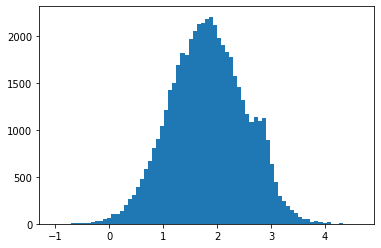

In [10]:
plt.hist(np.log10(xsample), bins=75)
plt.show()

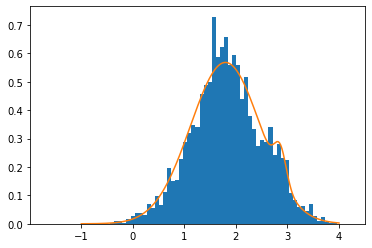

In [18]:
import scipy.stats
nor_pdf = scipy.stats.norm.pdf # normal distribution probability density function

def logPr(y,x):
  q,mu1,mu2,t1,t2 = x
  p = np.exp(q) / (1 + np.exp(q))
  sigma1, sigma2 = np.exp([t1,t2])
  lik = p * nor_pdf(y, loc=mu1, scale=sigma1) + (1-p) * nor_pdf(y, loc=mu2, scale=sigma2)
  return np.log(lik)

y = np.log10(mpexpenses)

# initial guess inspired by the above plot
initial_guess = [1,1.8,2.7, math.log(1.2), math.log(0.5)]
x_hat = scipy.optimize.fmin(lambda x: -np.sum(logPr(y, x)), initial_guess, maxiter=500)

# plot the fitted density, and a histogram of the actual log10(data)
# density = true to resacle the data so that it has total area = 1
plt.hist(np.log10(mpexpenses), bins=75, density=True)
y = np.linspace(-1,4,200)
f = np.exp(logPr(y, x_hat))
plt.plot(y,f)
plt.show()

## 1.1 Maximum likelihood estimation

## 1.2 Numerical optimisation with scipy

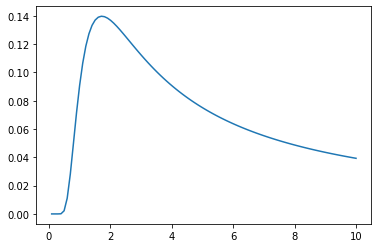

Optimization terminated successfully.
         Current function value: -0.139702
         Iterations: 13
         Function evaluations: 26


array([1.73204987])

In [11]:
import scipy.optimize
def f(x):
    return np.exp(-3*0.5/np.power(x,2)) / np.sqrt(2*np.pi*np.power(x,2))
  
# plot the graph
fig,ax = plt.subplots()
x0 = np.linspace(0,10,100)[1:] # remove x = 0, where the function does not work
ax.plot(x0,f(x0))
plt.show()

# find the optimised term t = log(x), where t is in real number range
# maximise f =  minimise -f
t_hat = scipy.optimize.fmin(lambda t: -f(np.exp(t)), np.log(2))
x_hat = np.exp(t_hat)
x_hat

### Softmax transformation

In [12]:
def f(x): # x is a vector of length 3
  s1,s2,s3 = x
  temp = np.exp([s1,s2,s3])
  p1,p2,p3 = temp / np.sum(temp)
  return 0.2 * np.log(p1) + 0.5 * np.log(p2) + 0.3 * np.log(p3)
  
s11,s12,s13 = scipy.optimize.fmin(lambda x: -f(x),[0,0,0])
s21,s22,s23 = scipy.optimize.fmin(lambda x: -f(x),[-1,-5,-2])
temp = np.exp([s11,s12,s13])
p11,p12,p13 = temp / np.sum(temp)
temp = np.exp([s21,s22,s23])
p21,p22,p23 = temp / np.sum(temp)
print([p11,p12,p13])
print([p21,p22,p23])

Optimization terminated successfully.
         Current function value: 1.029653
         Iterations: 75
         Function evaluations: 140
Optimization terminated successfully.
         Current function value: 1.029653
         Iterations: 71
         Function evaluations: 127
[0.1999985737307986, 0.5000103639153436, 0.2999910623538578]
[0.19999952879289712, 0.4999968101254145, 0.3000036610816883]


## 1.3 Exotic random variables

In [13]:
import random, math
def rf(a):
    # a sine wave with given amplitude a and random phase
    phi = random.random()
    def f(x):
        return a * math.sin(2*math.pi*(x+phi))
    return f # return a function f

f = rf(1)
print(f(2)) # return the same f(2) every time we call it
print(f(2))
g = rf(1) # generate a second random function g
print(g(2))

0.28496175536424617
0.28496175536424617
0.9345651839313245
